<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Project - House_Price
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement

This dataset is created for the prediction of Hous to be sold or not in next 3 months from an Indian perspective. The dataset contains various features that are important during the application for Architect community. The predicted output obtained from the classification algorithm gives a fair idea about the chances of a House being sold or not.

# Data Dictionary 
 
 The Data set contains 506 observations of House Price From Different Towns. Corresponding to each house price,data of other veriables is available on which price is suspected to depend.

## About the dataset (House Pricing prediction data) 

**price:** Value of the house 

**resid_area:** Preporsion of residential area in the town

**air_qual:** Quality of Air in that neighborhood

**room_num:** Avearge number of rooms in houses of that locality

**age:** How old is the house counstuction  in years

**dist1:** Distance from employment hub 1

**dist2:** Distance from employment hub 2

**dist3:** Distance from employment hub 3

**dist4:** Distance from employment hub 4

**teachers:** Number of Teachers per 1000 population in the town

**poor_prop:** Preportion of poor population in the town

**airport:** Is there an airport in city? (Yes/No)

**n_hos_beds:** Number of Hospital Beds per 1000 population in the town

**n_hot_rooms:** Number of Hotel rooms per 1000 population in town

**waterbody:** What type of natural fresh water sourcs is there in the city (Lake/River/Both/None)

**rainfall:** The yearly average rainfall in centimeters

**bus_ter:** Is there a bus terminal in city? (Yes/No)

**parks:** Proportion of land assigned as park and green areas in town

**Sold:** Is house sold or not (0-No/1-Yes)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Based on Boxplot](#boxplot)**
    - 2.7 - **[Based on IQR](#iqr)**
    - 2.8 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.9 - **[Scale the Data](#scale)**
    - 2.10 - **[Train-Test Split](#split)**
3. **[Logistic Regression (Full Model)](#logit)**
5. **[Coclusion](#result)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

In [4]:
# load the csv file
# store the data in 'df_houseprice'
df_houseprice = pd.read_csv("C:/Users/abc/Desktop/Linnear Model on R/Data Files/Logistic Reg Dataset/House-Price.csv")

# display first five observations using head()
df_houseprice.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.000000,32.310000,0.538000,6.575000,65.200000,4.350000,3.810000,4.180000,4.010000,24.700000,4.980000,YES,5.480000,11.192000,River,23,YES,0.049347,0
1,21.600000,37.070000,0.469000,6.421000,78.900000,4.990000,4.700000,5.120000,5.060000,22.200000,9.140000,NO,7.332000,12.172800,Lake,42,YES,0.046146,1
2,34.700000,37.070000,0.469000,7.185000,61.100000,5.030000,4.860000,5.010000,4.970000,22.200000,4.030000,NO,7.394000,101.120000,None,38,YES,0.045764,0
3,33.400000,32.180000,0.458000,6.998000,45.800000,6.210000,5.930000,6.160000,5.960000,21.300000,2.940000,YES,9.268000,11.267200,Lake,45,YES,0.047151,0
4,36.200000,32.180000,0.458000,7.147000,54.200000,6.160000,5.860000,6.370000,5.860000,21.300000,5.330000,NO,8.824000,11.289600,Lake,55,YES,0.039474,0


**Let us now see the number of variables and observations in the data.**

In [5]:
# use 'shape' to check the dimension of data
df_houseprice.shape

(506, 19)

**Interpretation:** The data has 506 observations and 19 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

In [6]:
# use 'dtypes' to check the data type of a variable
df_houseprice.dtypes

price          float64
resid_area     float64
air_qual       float64
room_num       float64
age            float64
dist1          float64
dist2          float64
dist3          float64
dist4          float64
teachers       float64
poor_prop      float64
airport         object
n_hos_beds     float64
n_hot_rooms    float64
waterbody       object
rainfall         int64
bus_ter         object
parks          float64
Sold             int64
dtype: object

**Interpretation:** The variables `price`, `Sold`, `resid_area`, `air_qual`, `room_num`, `age`,
    `dist1`, `dist2`, `dist3`, `dist4`, `teachers`, `poor_prop`,`n_hos_beds`, `n_hot_rooms`, `rainfall`,`parks` are numerical.

From the above output, we see that the data type of `bus_ter`,`waterbody`, `airport` are the 'Catagorical'.

And all veriables in Correct Datatypes

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

In [8]:
# First Check Catagorical Columns
df_cat = df_houseprice.select_dtypes(include=[np.object])
df_cat.head()

,airport,waterbody,bus_ter
0,YES,River,YES
1,NO,Lake,YES
2,NO,None,YES
3,YES,Lake,YES
4,NO,Lake,YES


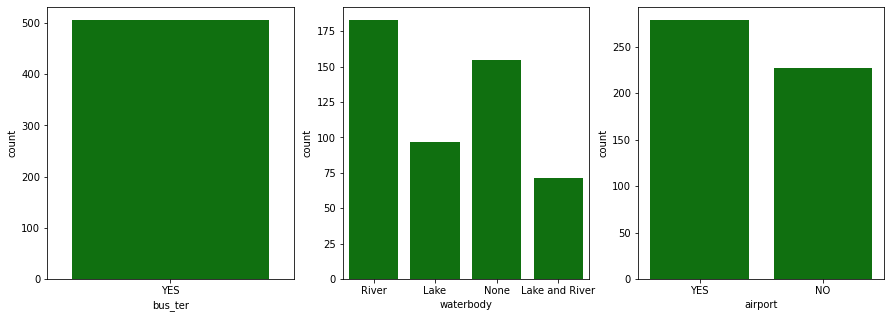

In [9]:
# Plot Subplots to Descover the Catagorical Veriables
fig,axes = plt.subplots(1,3,figsize = (15,5))
sns.countplot(df_cat.bus_ter,color = "g",ax = axes[0])
sns.countplot(df_cat.waterbody,color = "g",ax = axes[1])
sns.countplot(df_cat.airport,color = "g",ax = axes[2])
plt.show()

In [10]:
# So as we see here Bus_ter column have only one unique value that means it wont usefull for our analysis
# Axis  = 1  use for column 0 for row
# inplace = True indecate permanat changes
df_houseprice.drop("bus_ter",axis =1,inplace = True)

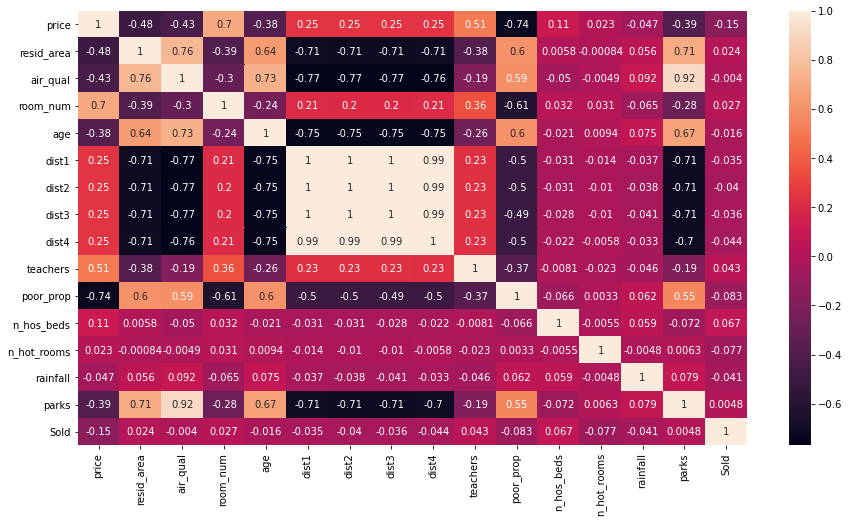

In [12]:
sns.heatmap(df_houseprice.corr(),annot = True,color = 'r')
plt.show()

**Interpretation:** The column `bus_ter` contains the serial number of the student, which is redundant for further analysis, Thus, we drop the column.
other than this we cant find any column to be unusable for our analysis.

<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

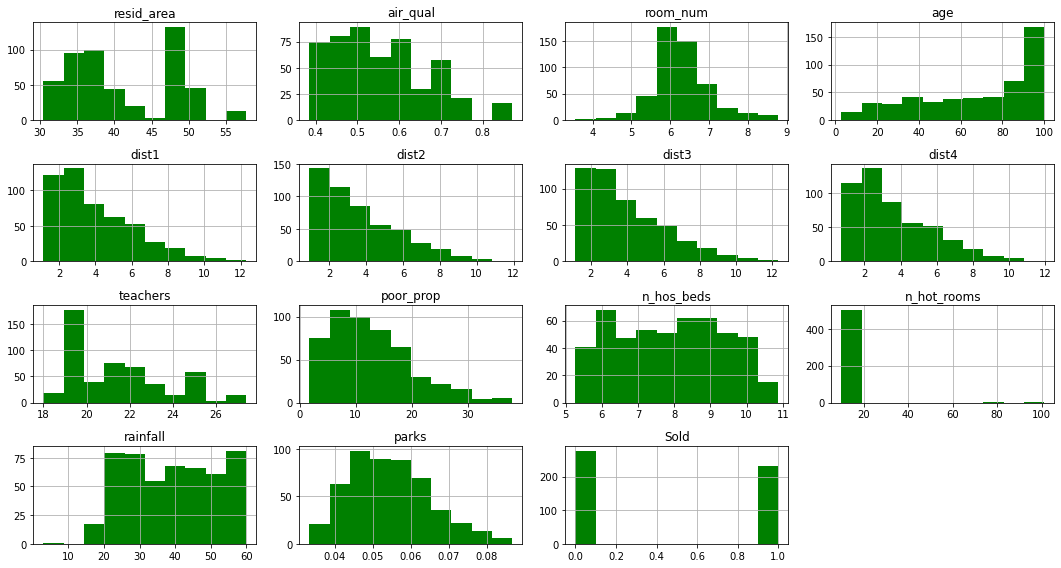

Skewness:


resid_area     0.295022
air_qual       0.729308
room_num       0.403612
age           -0.598963
dist1          1.010577
dist2          1.007492
dist3          1.003848
dist4          1.004680
teachers       0.802325
poor_prop      0.906460
n_hos_beds    -0.009176
n_hot_rooms   13.790552
rainfall       0.012971
parks          0.533991
Sold           0.183117
dtype: float64

In [16]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df_houseprice.drop('price', axis = 1).hist(color = "g")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_houseprice.drop('price', axis = 1).skew()

**Interpretation:** The above plot indicates that all the variables are not that much but slight normally distributed.

<a id="null"></a>
## 2.5 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [17]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_houseprice.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_houseprice.isnull().sum()*100/df_houseprice.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
n_hos_beds,8,1.581028
Sold,0,0.000000
dist3,0,0.000000
resid_area,0,0.000000
air_qual,0,0.000000
room_num,0,0.000000
age,0,0.000000
dist1,0,0.000000
dist2,0,0.000000
dist4,0,0.000000


So as wee see in `n_hos_beds` contain `8` missing values and the percentage of missing value is `1.581028 %` that meanse its small amout of data so we can replace it with average of that veriable

In [18]:
df_houseprice.fillna(df_houseprice["n_hos_beds"].mean(),inplace=True)

In [19]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_houseprice.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_houseprice.isnull().sum()*100/df_houseprice.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Sold,0,0.000000
parks,0,0.000000
resid_area,0,0.000000
air_qual,0,0.000000
room_num,0,0.000000
age,0,0.000000
dist1,0,0.000000
dist2,0,0.000000
dist3,0,0.000000
dist4,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="boxplot"></a>
## 2.6 Based on Boxplots:

The boxplot() in seaborn plots a box plot of the specified data. The box represents the quartiles of the data while the whiskers extend to show the rest of the distribution. The points that are determined to be outliers are identified using  the interquartile range (IQR) method.

The next section deals with IQR method.

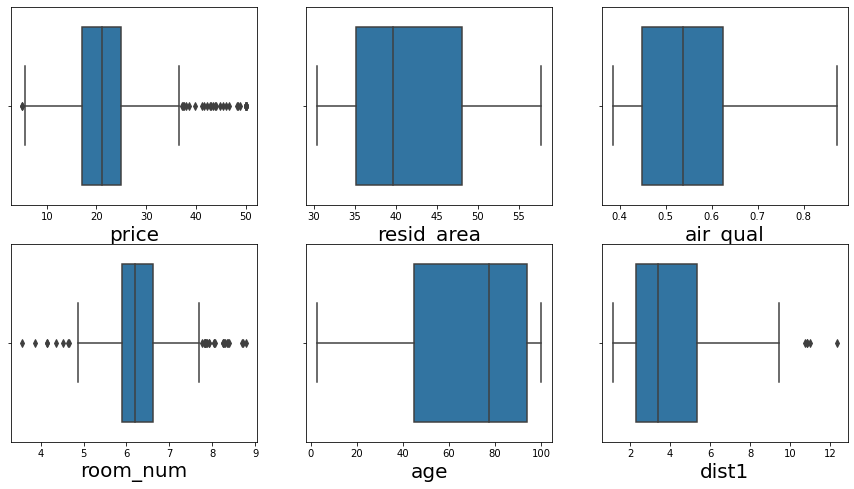

In [20]:
df_num = df_houseprice.select_dtypes(include=[np.number])
# Now Check Numirical Veriables
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

**Interpretation:** Out of the six numeric variables, variables `room_num`, `dist1` and `price` have outliers.

<a id="iqr"></a>
## 2.7 Based on IQR

The IQR method can be used when the data distribution in non-normal. Also the quartiles are less affected by the extreme values.

In [21]:
# obtain the first quartile
Q1 = df_num.dist1.quantile(0.25)

# obtain the third quartile
Q3 = df_num.dist1.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)
df_num = df_num[~((df_num.dist1 < (Q1 - 1.5 * IQR)) |(df_num.dist1 > (Q3 + 1.5 * IQR)))]

3.0974999999999997


In [22]:
# obtain the first quartile
Q1 = df_num.room_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.room_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)
df_num = df_num[~((df_num.room_num < (Q1 - 1.5 * IQR)) |(df_num.room_num > (Q3 + 1.5 * IQR)))]

0.7379999999999995


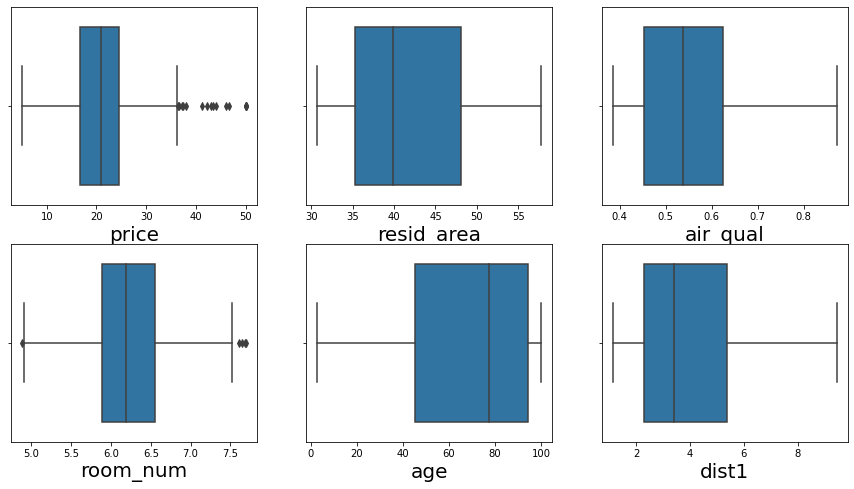

In [23]:
# Now Check Numirical Veriables
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

<a id="dummy"></a>
## 2.8 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [24]:
# store the target variable 'Chance of Admit' in a dataframe 'df_target'
df_target = df_houseprice['Sold']

# store all the independent variables in a dataframe 'df_feature'
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column
df_feature = df_houseprice.drop('price', axis = 1)

#### Filter numerical and categorical variables.

In [25]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.head()

,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
0,32.310000,0.538000,6.575000,65.200000,4.350000,3.810000,4.180000,4.010000,24.700000,4.980000,5.480000,11.192000,23,0.049347,0
1,37.070000,0.469000,6.421000,78.900000,4.990000,4.700000,5.120000,5.060000,22.200000,9.140000,7.332000,12.172800,42,0.046146,1
2,37.070000,0.469000,7.185000,61.100000,5.030000,4.860000,5.010000,4.970000,22.200000,4.030000,7.394000,101.120000,38,0.045764,0
3,32.180000,0.458000,6.998000,45.800000,6.210000,5.930000,6.160000,5.960000,21.300000,2.940000,9.268000,11.267200,45,0.047151,0
4,32.180000,0.458000,7.147000,54.200000,6.160000,5.860000,6.370000,5.860000,21.300000,5.330000,8.824000,11.289600,55,0.039474,0


In [26]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['airport', 'waterbody'], dtype='object')

The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [27]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

<a id="scale"></a>
## 2.9 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [33]:
target = df_houseprice['Sold']

In [34]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [35]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River
0,-1.287909,-0.144217,0.413672,-0.120013,0.179451,0.086032,0.103569,0.186459,1.459000,-1.075562,-1.653421,-0.353398,-1.294408,-0.480763,1,0,0,1
1,-0.593381,-0.740262,0.194274,0.367166,0.483280,0.508534,0.547446,0.687144,0.303094,-0.492439,-0.387954,-0.166000,0.225431,-0.782183,0,0,0,0
2,-0.593381,-0.740262,1.282714,-0.265812,0.502269,0.584490,0.495503,0.644228,0.303094,-1.208727,-0.345589,16.828839,-0.094535,-0.818115,0,0,1,0
3,-1.306878,-0.835284,1.016303,-0.809889,1.062454,1.092442,1.038545,1.116302,-0.113032,-1.361517,0.934910,-0.339029,0.465405,-0.687571,1,0,0,0
4,-1.306878,-0.835284,1.228577,-0.511180,1.038717,1.059212,1.137709,1.068618,-0.113032,-1.026501,0.631526,-0.334750,1.265320,-1.410280,0,0,0,0


<a id="split"></a>
## 2.10 Train-Test Split

Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.

In [36]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (404, 19)
y_train (404,)
X_test (102, 19)
y_test (102,)


#### Create a generalized function to create a dataframe containing the scores for the models.

<a id="logit"></a>
# 3. Logistic Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [37]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.641498
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Sold   No. Observations:                  404
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                           18
Date:                Sun, 14 Feb 2021   Pseudo R-squ.:                 0.06791
Time:                        04:25:32   Log-Likelihood:                -259.17
converged:                       True   LL-Null:                       -278.05
Covariance Type:            nonrobust   LLR p-value:                  0.004159
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.5377      0.280     -1.920      0.055      -1.086

**Interpretation:** The `Pseudo R-squ.` obtained from the above model summary is the value of `McFadden's R-squared`. This value can be obtained from the formula:

<p style='text-indent:25em'> <strong> McFadden's R-squared = $ 1 - \frac{Log-Likelihood}{LL-Null} $</strong> </p>

Where,<br>
Log-Likelihood: It is the maximum value of the log-likelihood function<br>
LL-Null: It is the maximum value of the log-likelihood function for the model containing only the intercept 

The LLR p-value is less than 0.05, implies that the model is significant.

There are different types of `pseudo R-squared` such as `Cox & Snell R-squared`, `Nagelkerke R-squared` and so on.

**Cox & Snell R-squared:** The convergence of the logistic model can be determined by the R-squared value. It is given by the formula:

<p style='text-indent:25em'> <strong> Cox & Snell R-squared = $ 1 - (\frac{L(M_{Intercept})}{L(M_{Full})})^{2/N} $</strong> </p>

Where,<br> 
L(M): The conditional probability of target variable given the independent variables<br>
N: Total number of observations

**Note:** The maximum of Cox & Snell R-squared is always less than 1. It is equal to $(1 - (L(M_{Intercept})^{2/N})$



**Nagelkerke R-squared:** It is defined as the ratio of Cox & Snell R-squared to the maximum of Cox & Snell R-squared. The formula is given as:

<p style='text-indent:25em'> <strong>Nagelkerke  R-squared = $ \frac{1 - (\frac{L(M_{Intercept})}{L(M_{Full})})^{2/N}}{1 -  (L(M_{Intercept})^{2/N}} $</strong> </p>



Thus, Nagelkerke R-squared can be equal to 1, if $L(M_{Full}) = 1$


**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [38]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 556.3301322649015


I can use the AIC value to compare different models created on the same dataset.

### Interpret the odds for each variable 

In [39]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,0.584113
resid_area,1.416403
air_qual,0.839191
room_num,1.087333
age,0.833748
dist1,2.805844
dist2,0.072753
dist3,11.433715
dist4,0.303381
teachers,1.037217


**Do predictions on the test set.**

In [40]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

305   0.448055
193   0.545174
65    0.595931
349   0.270325
151   0.596197
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [41]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [42]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 1, 1, 0, 1]

#### Plot the confusion matrix.

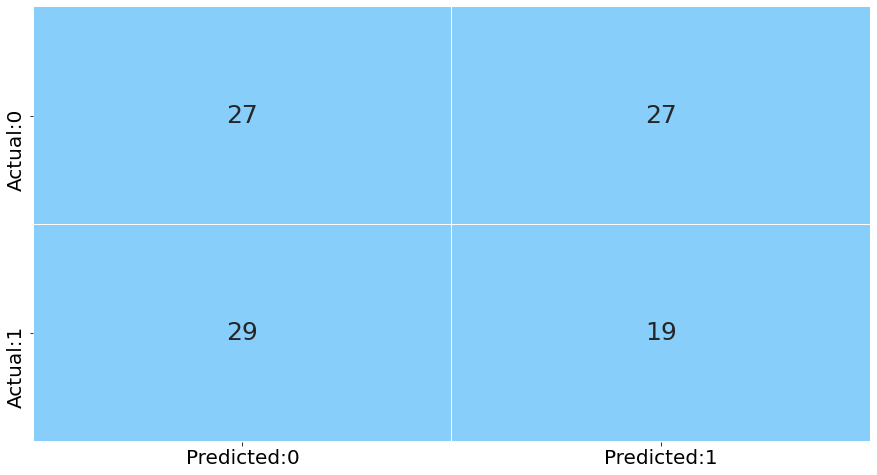

In [43]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [44]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

**Compute various performance metrics.**

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [45]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.41304347826086957

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [46]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.3958333333333333

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [47]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.5

In [48]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.4042553191489362

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [49]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.45098039215686275

**Interpretation:** For our dataset, both the values for accuracy and f1-score are equal. We can say that our model is 45% accurate.

In [50]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.48      0.50      0.49        54
           1       0.41      0.40      0.40        48

    accuracy                           0.45       102
   macro avg       0.45      0.45      0.45       102
weighted avg       0.45      0.45      0.45       102



**Interpretation:** 

From the above output, we can infer that the recall of the positive class is known as `sensitivity` and the recall of the negative class is `specificity`.

`support` is the number of observations in the corresponding class.

The `macro average` in the output is obtained by averaging the unweighted mean per label and the `weighted average` is given by averaging the support-weighted mean per label.

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [51]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: -0.10440835266821358


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.5) is -0.10, we can say that there is no substantial agreement between the actual and predicted values.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

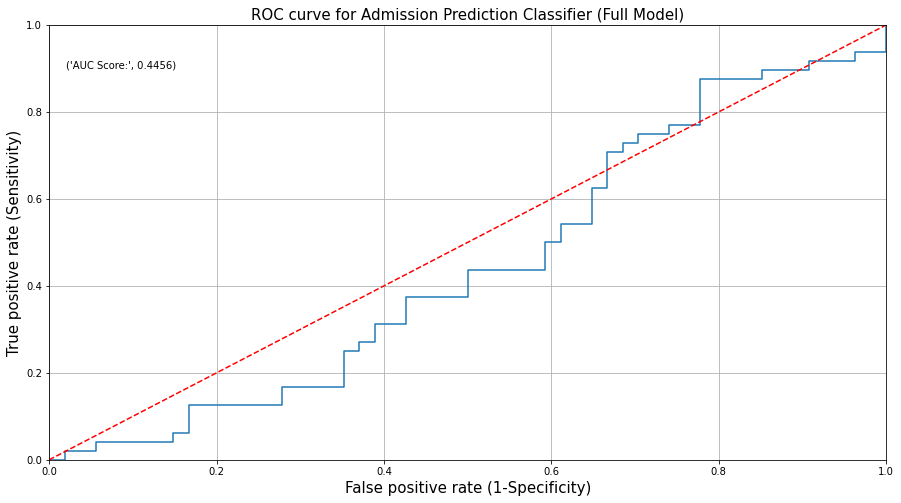

In [52]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

**Coclusion :** This Logistic regression having Accuracy of only 45 % means it performing wrost in next we bulit another model or best fit

<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Logistic Regression (End) <End>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## "END" New learning Begins lets explore other model and see what are there Responces